In [1]:
import pandas as pd
from os import path
import matplotlib.pyplot as plt
import numpy as np
import scipy
import seaborn as sns
%matplotlib inline
DATA_DIR = path.join('..', 'data')

In [2]:
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['pgf.rcfonts'] = False

In [3]:
RESULT_HEADER = ['Init_station','Init_time', 'Tick_length','Init_count',
                 'Travel_period','Count_type']
INDEX = ['Init_station','Init_time','Init_count','Count_type']
results = pd.DataFrame(np.load('stations_times.npy'))
timesteps = len(results.columns) - len(RESULT_HEADER)
results.columns = RESULT_HEADER + list(range(timesteps))
results.drop(columns=['Travel_period', 'Tick_length'], inplace=True)
results.replace({'Count_type': {0.0: 'S', 1.0: 'I', 2.0: 'R', 3.0: 'N'}}, inplace=True)
results.set_index(INDEX, inplace=True)
results.head()

0             1     \
Init_station Init_time Init_count Count_type                            
0.0          3.0       1.0        S           7947054.0  7.947054e+06   
                                  I                 1.0  1.006943e+00   
                                  R                 0.0  1.388889e-02   
                                  N           7947055.0  7.947055e+06   
             99.0      1.0        S           7947054.0  7.947054e+06   

                                                      2             3     \
Init_station Init_time Init_count Count_type                               
0.0          3.0       1.0        S           7.947054e+06  7.947054e+06   
                                  I           1.013934e+00  1.020973e+00   
                                  R           2.787421e-02  4.195662e-02   
                                  N           7.947055e+06  7.947055e+06   
             99.0      1.0        S           7.947054e+06  7.947054e+06   

                                                      4             5     \
Init_station Init_time Init_count Count_type                               
0.0          3.0       1.0        S           7.947054e+06  7.947054e+06   
                                  I           1.028062e+00  1.035199e+00   
                                  R           5.613680e-02  7.041544e-02   
                                  N           7.947055e+06  7.947055e+06   
             99.0      1.0        S           7.947054e+06  7.947054e+06   

                                                      6             7     \
Init_station Init_time Init_count Count_type                               
0.0          3.0       1.0        S           7.947054e+06  7.947054e+06   
                                  I           1.042386e+00  1.049623e+00   
                                  R           8.479320e-02  9.927079e-02   
                                  N           7.947055e+06  7.947055e+06   
             99.0      1.0        S           7.947054e+06  7.947054e+06   

                                                      8             9     \
Init_station Init_time Init_count Count_type                               
0.0          3.0       1.0        S           7.947054e+06  7.947054e+06   
                                  I           1.056910e+00  1.064248e+00   
                                  R           1.138489e-01  1.285282e-01   
                                  N           7.947055e+06  7.947055e+06   
             99.0      1.0        S           7.947054e+06  7.947054e+06   

                                                  ...               5880  \
Init_station Init_time Init_count Count_type      ...                      
0.0          3.0       1.0        S               ...       3.355473e+06   
                                  I               ...       5.017454e-01   
                                  R               ...       4.591581e+06   
                                  N               ...       7.947055e+06   
             99.0      1.0        S               ...       3.355683e+06   

                                                      5881          5882  \
Init_station Init_time Init_count Count_type                               
0.0          3.0       1.0        S           3.355473e+06  3.355473e+06   
                                  I           5.017454e-01  5.017454e-01   
                                  R           4.591581e+06  4.591581e+06   
                                  N           7.947055e+06  7.947055e+06   
             99.0      1.0        S           3.355683e+06  3.355683e+06   

                                                      5883          5884  \
Init_station Init_time Init_count Count_type                               
0.0          3.0       1.0        S           3.355473e+06  3.355473e+06   
                                  I           5.017454e-01  5.017454e-01   
                                  R  

The history saving thread hit an unexpected error (OperationalError('disk I/O error',)).History will not be written to the database.


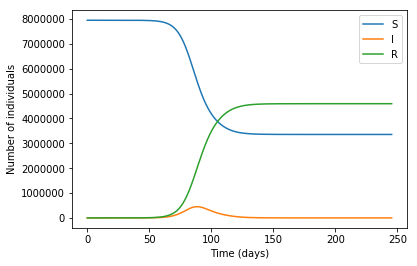

In [4]:
acton = results.xs((0,3,1), level=('Init_station','Init_time','Init_count')).T.drop(columns='N')
acton.index = [i / 24 for i in acton.index]
ax = acton.plot()
ax.set_xlabel('Time (days)')
ax.set_ylabel('Number of individuals')
ax.legend().title = ''
plt.savefig('../../diss/actonCentralSIR.pgf')

In [5]:
filtered=results.xs((1, 'I'), level=('Init_count', 'Count_type')).fillna(0)
filtered_R=results.xs((1, 'R'), level=('Init_count', 'Count_type')).fillna(0)

In [6]:
peaks = pd.concat([filtered.T.idxmax(), filtered.T.max(), filtered_R.T.max()], axis=1)
peaks.columns = ['Time', 'Value', 'Total']
peaks['Time'] = peaks['Time'] / 24
peaks.to_csv('peaks.csv')

In [7]:
peaks.xs(210, level='Init_station')

,Time,Value,Total
Init_time,,,
3.0,88.5,455767.730583,4.593322e+06
99.0,88.5,455474.568230,4.593186e+06
123.0,88.5,455574.096674,4.593228e+06


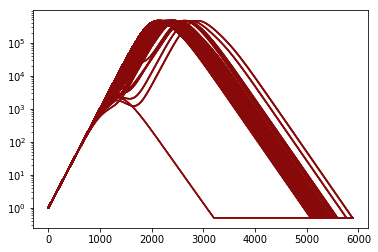

In [8]:
filtered.T.plot(legend=None, color='#870909', logy=True)

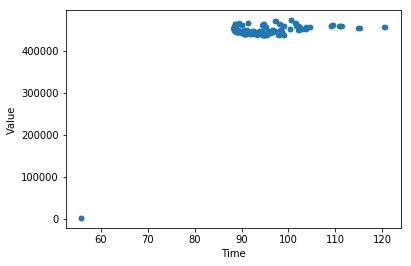

In [9]:
peaks.plot.scatter('Time', 'Value')

''

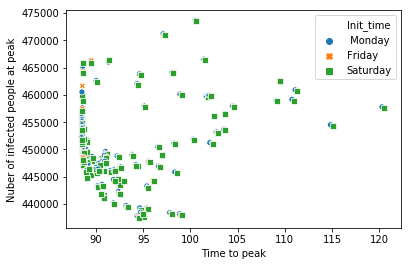

In [10]:
df = peaks[peaks['Total'] >= 1e5].reset_index('Init_time').replace(
    {'Init_time': {3: ' Monday', 24*4+3: 'Friday', 24*5+3: 'Saturday'}}
)
ax = sns.scatterplot(x='Time', y='Value', style='Init_time', hue='Init_time', data=df)
ax.set_xlabel('Time to peak')
ax.set_ylabel('Nuber of infected people at peak')
;

Text(0,0.5,'Total number of cases')

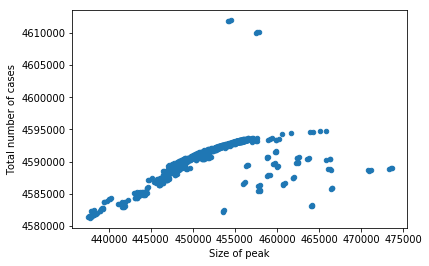

In [13]:
ax = peaks[peaks['Total'] > 1e6].plot.scatter('Value', 'Total')
ax.set_xlabel('Size of peak')
ax.set_ylabel('Total number of cases')
# plt.savefig('../../diss/sizeTotal.pgf')

In [14]:
data = peaks.sort_values('Value')
x = data['Value'].values
y = data['Total'].values
scipy.stats.spearmanr(x, y)

SpearmanrResult(correlation=0.7783968470679999, pvalue=1.8795180480243832e-241)

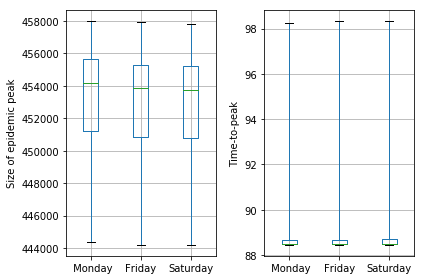

In [17]:
labelled_days = peaks.reset_index().replace(
    {'Init_time': {3: ' Monday', 24*4+3: 'Friday', 24*5+3: 'Saturday'}}
)
fig = plt.gcf()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
labelled_days.boxplot(
    by='Init_time', column='Value', whis=[5,95], showfliers=False, ax=ax1
)
ax1.set_ylabel('Size of epidemic peak')
labelled_days.boxplot(
    by='Init_time', column='Time', whis=[5,95], showfliers=False, ax=ax2
)
ax2.set_ylabel('Time-to-peak')
plt.suptitle('')
for ax in [ax1, ax2]:
    ax.set_xlabel('')
    ax.set_title('')
plt.tight_layout()
plt.savefig('../../diss/startTimeBoxplot.pgf')

In [18]:
scipy.stats.ttest_rel(labelled_days[
    labelled_days['Init_time'] == ' Monday'].sort_values('Init_station')['Time'],
                      labelled_days[
    labelled_days['Init_time'] == 'Saturday'].sort_values('Init_station')['Time'])

Ttest_relResult(statistic=-8.513222541616258, pvalue=3.597818659133554e-16)